In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt #描画ライブラリ
import pandas_datareader.data as web #データのダウンロードライブラリ
import pandas as pd
import numpy as np
import cvxopt
import os
import datetime

#### DataReader(stock_code, source, start, end)
endを省略すると，直近までのデータがダウンロードされます．引数は以下の通り．  
1. stock_code : データセット名
2. source : データ取得先
3. start : 取得開始日付
4. end : 取得終了日付

<AxesSubplot:xlabel='Date'>

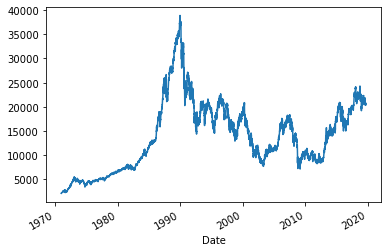

In [196]:
start = datetime.datetime(1971,1,4)
end = datetime.datetime(2019,8,30)

tsd = web.DataReader("^N225","yahoo",start, end).dropna() # jpy
tsd.loc[:,'Adj Close'].plot()

In [197]:
tsd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1971-01-05,1989.439941,1989.439941,1989.439941,1989.439941,0.0,1989.439941
1971-01-06,1981.739990,1981.739990,1981.739990,1981.739990,0.0,1981.739990
1971-01-07,2000.959961,2000.959961,2000.959961,2000.959961,0.0,2000.959961
1971-01-08,2040.930054,2040.930054,2040.930054,2040.930054,0.0,2040.930054
1971-01-12,2092.330078,2092.330078,2092.330078,2092.330078,0.0,2092.330078


In [198]:
tsd_weekly = tsd.resample(rule="W").mean()
tsd_weekly.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1971-01-10,2003.267487,2003.267487,2003.267487,2003.267487,0.0,2003.267487
1971-01-17,2091.816650,2091.816650,2091.816650,2091.816650,0.0,2091.816650
1971-01-24,2108.250000,2108.250000,2108.250000,2108.250000,0.0,2108.250000
1971-01-31,2103.310010,2103.310010,2103.310010,2103.310010,0.0,2103.310010
1971-02-07,2121.331982,2121.331982,2121.331982,2121.331982,0.0,2121.331982


In [199]:
# ディレクトリの指定
os.chdir('C:/Users/bldyr/OneDrive/デスクトップ/自己研鑽用/データ取得')
os.getcwd()

'C:\\Users\\bldyr\\OneDrive\\デスクトップ\\自己研鑽用\\データ取得'

In [200]:
tsd_weekly.to_excel('NK225_data_weekly.xlsx', sheet_name = 'NK225_Data')

#### 複数銘柄の取得
基礎研究用に債券指数だと思ってやってみる( ´艸｀)

Pandasで時系列データを月，四半期，年ごとに合計や平均を算出する方法．  
https://note.nkmk.me/python-pandas-time-series-multiindex/

In [2]:
# ディレクトリの指定
os.chdir('C:/Users/bldyr/OneDrive/デスクトップ/自己研鑽用/データ取得')
os.getcwd()

'C:\\Users\\bldyr\\OneDrive\\デスクトップ\\自己研鑽用\\データ取得'

##### 取得したデータの日次ベースでの収益率を週率に変換．

In [4]:
def get_val(data, company, start, end):
    try: 
        return ((web.DataReader(data, company, start, end)["Adj Close"].dropna()).pct_change(axis = 0)).resample(rule="W").mean() # resample で止めちゃうとエラーが出る
    except:
        pass
    return 0

In [5]:
data = ["^N225", "^GSPC"]               # Yahoo_financeの証券コード "2510.T":NOMURA BPI, "^GSPC";:S&P500
company = "yahoo"                       # Yahoo Finance からデータ取得
start = datetime.datetime(1983,1,4)     # データのスタート時点
end = datetime.datetime(2022,1,14)      # データの終了時点

df = get_val(data, company, start, end)
df.to_excel('Data_weekly.xlsx', sheet_name = 'Data')

Excelベースで一度データを整理したのちに，エクセルファイルを読み込む．

In [109]:
df = pd.read_csv("data_weekly.csv", encoding="shift-jis") # , columns = ["NK225", "S&P500"] , index_col=0 最初のカラムを入れない
df.head()

,Date,日経225,S&P500
0,1983-01-09 00:00:00,0.006108,0.008980
1,1983-01-16 00:00:00,-0.001966,0.002044
2,1983-01-23 00:00:00,-0.002446,-0.003816
3,1983-01-30 00:00:00,0.000720,0.001043
4,1983-02-06 00:00:00,-0.000015,0.002295


In [97]:
df.columns

Index(['Date', '日経225', 'S&P500'], dtype='object')

In [96]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index({"Date"})
df.resample(rule="W").mean()

TypeError: The parameter "keys" may be a column key, one-dimensional array, or a list containing only valid column keys and one-dimensional arrays.. Received column of type <class 'set'>

In [306]:
print(df.iat[0, 0])

1983/1/9


In [70]:
print(df["Date"].max())

2022.0


In [307]:
start = float(df.iat[0, 0][:4])
print(start)

1983.0


In [110]:
df["Date"] = (df["Date"].str[:4]).astype(float) # Dateのデータタイプの変更
df["Date"].head()

0    1983.0
1    1983.0
2    1983.0
3    1983.0
4    1983.0
Name: Date, dtype: float64

特定の行（何年のデータか）を抽出するコードの作成．

In [108]:
df.to_excel('Return.xlsx', sheet_name = 'Data')

In [113]:
data = df[df["Date"] == 1983]
print(data)

      Date     日経225    S&P500
0   1983.0  0.006108  0.008980
1   1983.0 -0.001966  0.002044
2   1983.0 -0.002446 -0.003816
3   1983.0  0.000720  0.001043
4   1983.0 -0.000015  0.002295
5   1983.0  0.000157  0.002368
6   1983.0  0.000793  0.000693
7   1983.0  0.000289  0.003014
8   1983.0 -0.001012  0.005245
9   1983.0  0.001666 -0.003145
10  1983.0  0.003772 -0.001767
11  1983.0  0.002062  0.004610
12  1983.0  0.005260  0.000497
13  1983.0 -0.001012 -0.000128
14  1983.0  0.002760  0.007612
15  1983.0  0.000262  0.002119
16  1983.0  0.002138  0.003980
17  1983.0  0.001327  0.006444
18  1983.0 -0.000941 -0.001431
19  1983.0 -0.001579 -0.003372
20  1983.0  0.001321  0.002872
21  1983.0 -0.003112 -0.000030
22  1983.0 -0.000242 -0.002100
23  1983.0  0.004722  0.007819
24  1983.0  0.003265  0.001517
25  1983.0  0.002046 -0.002037
26  1983.0  0.002145 -0.002284
27  1983.0 -0.002502 -0.003328
28  1983.0  0.002104  0.005599
29  1983.0  0.001898 -0.007559
30  1983.0 -0.002914 -0.000985
31  1983

In [135]:
data["S&P500"].mean()

-0.0010805656666666667

In [136]:
np.append(data["日経225"].mean(), data["S&P500"].mean())

array([-0.00188577, -0.00108057])

In [55]:
columns = df.columns[1:].values
print(columns)

['日経225' 'S&P500']


In [66]:
wgt_1 = np.array([100, 0])
np.dot(np.dot(wgt_1, matrix),wgt_1.T)

0.05806365486574718

In [144]:
wht = 100
age = 24

rate = []
vol = [] # ボラティリティを格納するリストを用意
for i in range(100):
    if df.iat[0, 0] + i <= df["Date"].max():
        wgt = np.array([100 - (age + i), age + i]) / 100
        data = df[df["Date"] == df.iat[0, 0] + i]
        returns = np.dot(wgt, np.append(data["日経225"].mean(), data["S&P500"].mean()).T) # これでやってるのは週率データ
        matrix =  np.cov(data["日経225"], data["S&P500"]) # 後ほど修正が必要な個所
        print(returns)
        stev = np.sqrt(np.dot(np.dot(wgt, matrix), wgt.T))
        rate.append(returns)
        vol.append(stev)
    else:
        break


0.0008211376727058824
0.0006937932311320752
0.0006471334610384617
0.0014634921382549021
0.0008658430141176472
0.0004110930787307692
0.001087749013018868
-0.0014824009491538452
0.00033339088161538457
0.00011574198364038468
-0.00018188401557692316
0.000236396415673077
0.0006635929011320753
0.00039553245569615397
-0.0001847708397307692
0.0006838750798076923
0.001079571451923077
-0.0005824772228301885
-0.0007327978128076923
-0.00036358503323076914
0.0010057781653846154
0.00034757451000000015
0.0010364851012692308
0.0004523437398679245
-7.179579992307697e-05
-0.0021809700847500004
0.0013175468644230771
8.116397453846164e-05
-0.0004880207823076923
0.0006990590409433963
0.0021671058883961543
0.0006118370641346154
5.244013661538466e-05
0.0002380392057499999
0.0007018967106037734
-0.00024514721696153855
0.001032682679294118
0.000907732464423077
0.0008450516779999998
-0.001378489864


In [146]:
print(rate)

[0.0008211376727058824, 0.0006937932311320752, 0.0006471334610384617, 0.0014634921382549021, 0.0008658430141176472, 0.0004110930787307692, 0.001087749013018868, -0.0014824009491538452, 0.00033339088161538457, 0.00011574198364038468, -0.00018188401557692316, 0.000236396415673077, 0.0006635929011320753, 0.00039553245569615397, -0.0001847708397307692, 0.0006838750798076923, 0.001079571451923077, -0.0005824772228301885, -0.0007327978128076923, -0.00036358503323076914, 0.0010057781653846154, 0.00034757451000000015, 0.0010364851012692308, 0.0004523437398679245, -7.179579992307697e-05, -0.0021809700847500004, 0.0013175468644230771, 8.116397453846164e-05, -0.0004880207823076923, 0.0006990590409433963, 0.0021671058883961543, 0.0006118370641346154, 5.244013661538466e-05, 0.0002380392057499999, 0.0007018967106037734, -0.00024514721696153855, 0.001032682679294118, 0.000907732464423077, 0.0008450516779999998, -0.001378489864]


In [148]:
port = []

AttributeError: 'list' object has no attribute 'T'

In [287]:
print(df["Date"].str[:4])

0       1983
1       1983
2       1983
3       1983
4       1983
        ... 
2032    2021
2033    2021
2034    2022
2035    2022
2036    2022
Name: Date, Length: 2037, dtype: object


In [269]:
df["Date"].dtype

dtype('O')

#### ポートフォリオのウェイトを決定する関数

# 不要の産物

In [ ]:
df_rate = df.pct_change(axis = 0) # 変化率の計算
df_rate.to_excel('Data_weekly.xlsx', sheet_name = 'Data')

In [ ]:
df = pd.read_csv("data_weekly.csv") # , columns = ["NK225", "S&P500"]
df["date"] = pd.to_datetime(df["Date"])
df.resample("Y").agg(['mean', 'std'])
df.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
print(df["Date"].str[:4])

KeyError: 'Column not found: Date'

In [ ]:
def port_()
df_mean = (df[["^N225","^GSPC"]].mean() * 250).dropna()
df_std = (df[["^N225","^GSPC"]].std() ** 250).dropna()